In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML
# import line_profiler as lp 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import sys
sys.path.append('../src')
# from model import *
from model2D import *
from datagen import *
from analysis import *
from datagen2D import *

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on GPU: ", device)
else:
    device = torch.device("cpu")
    print("Running on CPU")

torch.set_default_device(device)
# torch.cuda.synchronize()
torch._dynamo.config.suppress_errors = True
torch.set_float32_matmul_precision("high")

Running on GPU:  cuda:0
Running on GPU:  cuda:0


## Dataset Testing

In [2]:
# lp profile of smooth_wandering_2D_complex_bound
# %load_ext line_profiler
# %lprun -f smooth_wandering_2D_complex_bound smooth_wandering_2D_complex_bound(64,200,bound=0.5,v_sigma=0.02,d_sigma=0.1)

## Model

In [3]:
# input_data = np.load("../datasets/gradual_2D_hdv_randomstart_vrng2_5000_25_64.npy",allow_pickle=True)
# input_data = np.load("../datasets/gradual_2D_hdv_randomstart_2000_10_64.npy",allow_pickle=True)
# input_data = np.load("../datasets/constant_2D_hdv_randomstart_vrng0.01_2000_200_64.npy",allow_pickle=True)
input_data = np.load("../datasets/gradual_2D_ratinabox_5000_25_64.npy",allow_pickle=True)
# input_data = np.load("../datasets/constant_2D_ratinaboxnew_1000_40_256.npy",allow_pickle=True)
# input_data = np.load("../datasets/constant_2D_ratinaboxnew_500_300_128.npy",allow_pickle=True)
# input_data = hd_direction_input_convert(input_data)

In [7]:
hidden_size = 144
input_size = 2
# nav_size = 1

# model1 = RNN_circular_LowEtAl_bridged(input_size//2,hidden_size,lr=0.0001,irnn=True,outputnn=False,Wx_normalize=False,activation=True,bias=False,nav_space=1,batch_size=64).to(device)
# model1 = RNN_circular_2D_xy_Low_randomstart(input_size//2,hidden_size,lr=0.0002,act_decay=0.0,weight_decay=0.01,noise=0.0).to(device)
# model1 = RNN_circular_1D_to_23D_arccos(input_size//2,hidden_size,lr=0.0005,act_decay=0.01,weight_decay=0.01,noise=0.00).to(device)
# model1 = CwRNN_low(input_size,hidden_size,n_modules=3).to(device)
model1 = RNN_circular_2D_randomstart_trivial_sorcher(input_size//2,hidden_size,lr=0.0002,act_decay=1.0,weight_decay=0.01,noise=0.0,bias=True).to(device)
# model1 = CfC_solver_Low(input_size,hidden_size,act_decay=0.0,weight_decay=0.0,lr=0.0000001,if_lstm=True,if_wiring=True).to(device)
# model1 = RNN_circular_2D_xy_relative_randomstart(input_size,hidden_size,lr=0.0002,act_decay=0.01,weight_decay=0.00).to(device)

# model1 = RNN_arccos_2x1D(input_size,hidden_size,if_low=False,lr=0.0005,irnn=True)

# model1.optimizer = torch.optim.Adam(model1.parameters(), lr=0.01, weight_decay=model1.weight_decay)
model1 = torch.compile(model1)



train = False

if train:
    # _ = model1.train_gradual(epochs=1500)
    _ = model1.train_gradual_manual(input_data)
    # _ = model1.train_ratinabox(200)
    # _ = model1.train_gradual_loader(data_loader)
    # model1.base_training_tsteps = 40
    # _ = model1.train(epochs=10000)
    model1.plot_losses(average=30)
else:
    # model1.load_state_dict(torch.load("../trained models/LowEtAl_bridged_10000gradual+2000base.pt"))
    # model1.load_state_dict(torch.load("../trained models/LowEtAl_bridged_10000gradual.pt",map_location=torch.device('cpu')))
    torch.cuda.empty_cache()
    model1.load_state_dict(torch.load("../trained models/RNN_N288_5000const_ratinabox_Sophia_40tsteps_act+weightdecay_0.0002lr.pt",map_location=torch.device('cpu')))
    
# torch.save(model1.state_dict(), "../trained models/LowEtAl_bridged_reduced_Gradual_lossiequaloroverj_maskonangle_lossscale_4000gradual.pt")

In [5]:
model1.lr

0.0005

In [ ]:
# model1.start_encoder.weight.norm()
# model1.output.weight.norm()

tensor(1.6681, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

Loss: 0.07235: 100%|██████████| 500/500 [01:50<00:00,  4.53it/s]

Losses array was not a multiple of average. Truncated to 5880


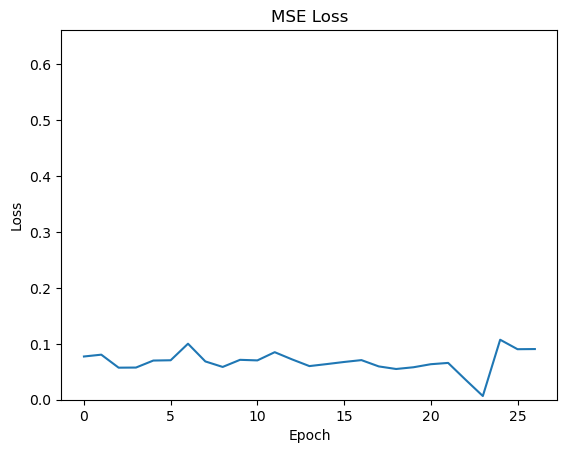

In [ ]:
# input_data = np.load("../datasets/constant_2D_2000_200_64.npy",allow_pickle=True)
# model1.optimizer = SophiaG(model1.parameters(), lr=0.0002, weight_decay=model1.weight_decay)
# model1.optimizer = torch.optim.Adam(model1.parameters(), lr=0.002, weight_decay=model1.weight_decay)
_ = model1.train_gradual_manual(input_data)
# _ = model1.train_ratinabox(200)
model1.plot_losses(average=30)

In [ ]:
# model1.base_training_tsteps = 200
# _ = model1.train(epochs=1)
# model1.plot_losses(average=30)

In [ ]:
# torch.save(model1.state_dict(), "../trained models/LTC_N20_500+500gradual_hdv_Sophia+Adam_100tsteps_0.005lr.pt")
# torch.save(model1.state_dict(), "../trained models/CfC_lstm_N1024_5000gradual+1700const_ratinabox_Sophia_200+300+400tsteps_actdecay_weightdecay_0.00005+0.00001lr.pt")
# torch.save(model1.state_dict(), "../trained models/Low_2D_N288_5000const_ratinabox_Sophia_40tsteps_act+weightdecay_0.0002lr.pt")

## Analysis

### Norm of activity per timestep

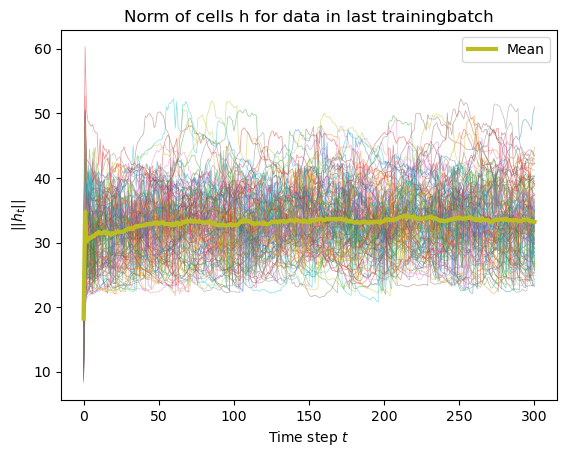

Mean norm:  33.07206


In [ ]:
htss = model1.hts.norm(dim=2)
htss = htss.cpu().detach().numpy()
plot_norm(htss,avg_only=False)

In [ ]:
# outweights = model1.start_encoder.weight
# plt.imshow(outweights.T.cpu().detach().numpy(), cmap='gray',aspect="auto",interpolation="nearest")
# plt.colorbar()
# # Enlarge the x axis to make the plot clearer
# # plt.xlim(0, 100)
# plt.xlabel('Output neuron')
# plt.ylabel('Input neuron')
# plt.title('Output weights')
# plt.show()

# Choose elements that are greater than 0.1
# (outweights.T > 0.2).cpu().detach().numpy().argmax(axis=0)

In [ ]:
model1.start_encoder.bias

### Tuning curves

#### 1D

In [ ]:
# activity, bin_edges = tuning_curve(model1,bins=2000)
# plot_tuning_curve(activity,bin_edges,91,spherical=False,linear=False,scale_to_one=True, plot_head_frac=1/10)

#### 2D Tuning curves

In [15]:
from datagen2D_v2 import *

Running on GPU:  cuda:0


In [13]:
# torch._dynamo.config.suppress_errors = True
t_test = 40
test_batch_size = 1000
# data,labels = smooth_wandering_2D_squarefix_randomstart_hdv(test_batch_size,t_test,bound=0.5,v_sigma=0.02,d_sigma=0.08,v_bound_reduction=0.15,stability=0.00)
# data,labels = smooth_wandering_2D_squarefix_randomstart_hdv_vrng(test_batch_size,t_test,bound=0.5,v_sigma_mean=0.01,d_sigma=0.08,v_bound_reduction=0.15,stability=0.00)
# data,labels = smooth_wandering_2D_ratinabox(test_batch_size,t_test)
# data,labels = lowetal_2D(test_batch_size,t_test)
# data,labels = smooth_wandering_2D_circular(test_batch_size,t_test,bound=0.5,v_sigma=0.01,d_sigma=0.1)
data,labels = smooth_wandering_2D_circular_randomstart_hdv(test_batch_size,t_test,bound=0.5,v_sigma=0.01,d_sigma=0.08)
# data,labels = smooth_wandering_2D_circular_hdv(test_batch_size,t_test,bound=0.5,v_sigma=0.01,d_sigma=0.08)

In [16]:
test_generator = datagen2D_OU(circular=False)
data, labels = test_generator(test_batch_size,t_test)

In [ ]:
# torch.set_float32_matmul_precision('high')
# start0 = torch.zeros_like(labels)
# torch._dynamo.config.verbose=True
activity, bin_edges_x, bin_edges_y = tuning_curve_2D_fullmodel(model1,bins=75, in_activity=(data, labels),start=data[:,0,:])

[2023-08-18 21:26:11,594] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,603] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,612] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,621] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,630] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,645] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,657] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,667] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,677] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,687] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,699] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 21:26:11,710] torch._inductor.u

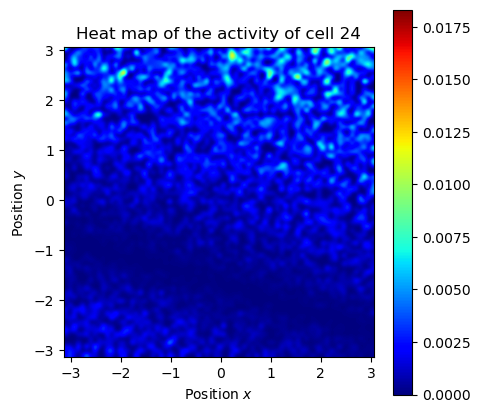

100%|██████████| 8/8 [00:00<00:00, 1446.31it/s]


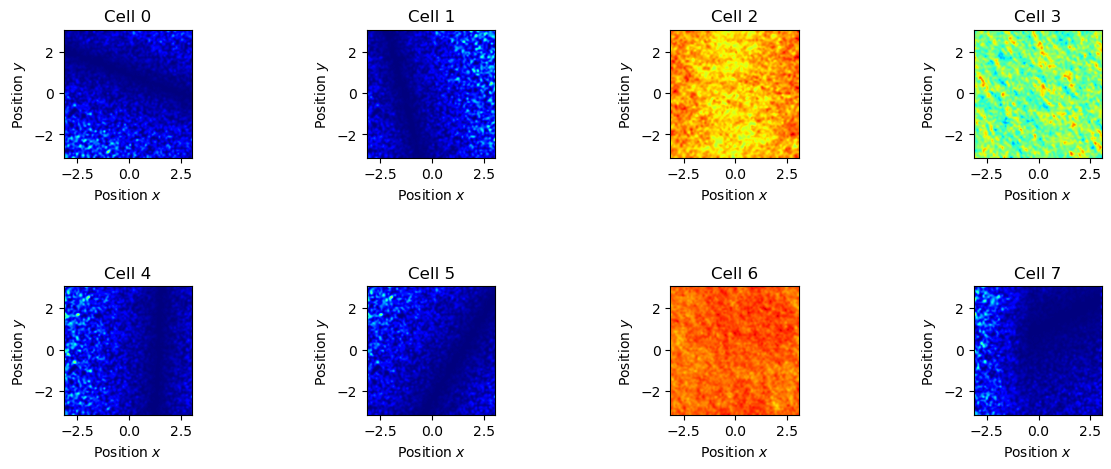

In [ ]:
plot_2D_tuning_curve_2(activity,bin_edges_x, bin_edges_y,k_test=24,plot_head_frac=1/36,scale_to_one=False,more_plots=True)

In [ ]:
activity.shape

(128, 100, 100)

### Low dimensional representations

#### 1D

In [ ]:
activity.shape

(288, 50, 50)

In [ ]:
activity_flat = activity.reshape(activity.shape[0],-1)
embedding, reducer = lowD_reduce(activity_flat,if_pca=False,n_components=3,plot=True,n_neighbors=1000)

(5625, 3)


#### 2D

In [ ]:
# activity_flatx = activity[:activity.shape[0]//2].reshape(activity.shape[0]//2,-1)
# activity_flaty = activity[activity.shape[0]//2:].reshape(activity.shape[0]//2,-1)
# embeddingx, reducerx = lowD_reduce(activity_flatx,if_pca=True,n_components=2,plot=True,n_neighbors=1000)
# embeddingy, reducery = lowD_reduce(activity_flaty,if_pca=True,n_components=2,plot=True,n_neighbors=1000)

# activity_flatx = activity[:activity.shape[0]//3].reshape(activity.shape[0]//3,-1)
# activity_flaty = activity[activity.shape[0]//3:2*activity.shape[0]//3].reshape(activity.shape[0]//3,-1)
# activity_flatz = activity[2*activity.shape[0]//3:].reshape(activity.shape[0]//3,-1)
# embeddingx, reducerx = lowD_reduce(activity_flatx,if_pca=True,n_components=2,plot=True,n_neighbors=500)
# embeddingy, reducery = lowD_reduce(activity_flaty,if_pca=True,n_components=2,plot=True,n_neighbors=500)
# embeddingz, reducerz = lowD_reduce(activity_flatz,if_pca=True,n_components=2,plot=True,n_neighbors=500)

In [ ]:
# xembedding, xreducer = lowD_reduce(xactivity,if_pca=True,n_components=2,plot=True)
# yembedding, yreducer = lowD_reduce(yactivity,if_pca=True,n_components=2,plot=True)

### Accuracy testing

#### 1D

In [ ]:
# angs, dy, err, y_hat, y = test_angle_inference(model1,reducer)


In [ ]:
# plot_accuracy(angs,dy,y_hat,y)

In [ ]:
# plot_path_accuracy(angs,y,example_path=1)

#### 2D accuracy testing

In [ ]:
# data,labels = smooth_wandering_2D_squarefix(300,200,bound=0.5,v_sigma=0.01,d_sigma=0.1,v_bound_reduction=0.15,stability=0.01)
data,labels = smooth_wandering_2D_ratinabox(1000,40)

xdata = data[:,:,0]
ydata = data[:,:,1]
xlabels = labels[:,:,0]
ylabels = labels[:,:,1]

# call old y for theta (theoretical angles)
xangs, xdtheta, xerr, xhidden_state, xtheta = test_angle_inference(model1,reducer,t_test=200,in_activity=(xdata,xlabels),start=0)
yangs, ydtheta, yerr, yhidden_state, ytheta = test_angle_inference(model1,reducer,t_test=200,in_activity=(ydata,ylabels),start=0)

NameError: name 'reducer' is not defined

In [ ]:
# data,labels = smooth_wandering_2D_squarefix(300,200,bound=0.5,v_sigma=0.01,d_sigma=0.1,v_bound_reduction=0.15,stability=0.01)
data,labels = smooth_wandering_2D_ratinabox(1000,40)

xstarts = data[:,0,0,0].cpu().numpy()
ystarts = data[:,0,1,0].cpu().numpy()

# call old y for theta (theoretical angles)
xangs, xdtheta, xerr, xhidden_state, xtheta = test_angle_inference_x1D(model1,reducerx,t_test=40,in_activity=(data,labels),start=xstarts,dim="x")
yangs, ydtheta, yerr, yhidden_state, ytheta = test_angle_inference_x1D(model1,reducery,t_test=40,in_activity=(data,labels),start=ystarts,dim="y")

Mean error:  0.4808464460500509
Mean error:  0.15352675560822981


In [ ]:
xlabels[0,0]

tensor(-0.0081)

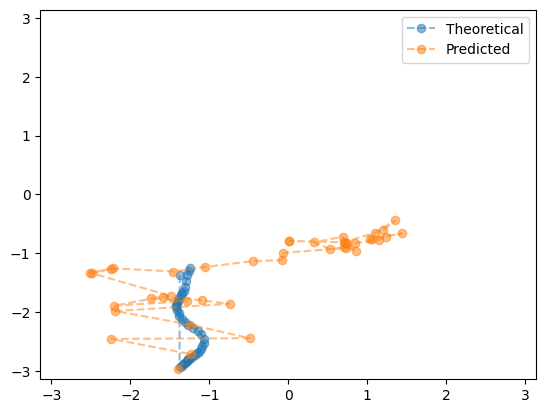

In [ ]:
n = 2
pos = np.zeros((xangs.shape[0],xangs.shape[1],2))
pos[:,:,0] = xtheta
pos[:,:,1] = ytheta
plt.plot(xtheta[n,:],ytheta[n,:],'--o', alpha=0.5, label='Theoretical')

xpath = np.zeros((xangs.shape[0],xangs.shape[1]+1))
ypath = np.zeros((xangs.shape[0],xangs.shape[1]+1))
xpath[:,0] = xstarts
ypath[:,0] = ystarts
for i in range(1,xangs.shape[1]+1):
    xpath[:,i] = xpath[:,i-1] + xangs[:,i-1]
    ypath[:,i] = ypath[:,i-1] + yangs[:,i-1]

pos_hat = np.zeros((xangs.shape[0],xangs.shape[1]+1,2))
pos_hat[:,:,0] = xpath
pos_hat[:,:,1] = ypath

plt.plot(xpath[n,:],ypath[n,:],'--o', alpha=0.5, label='Predicted')
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
# plt.axis('equal')
plt.legend()
plt.show()

In [ ]:
# plt.plot(xtheta[n,:],label="Theoretical x")
# plt.plot(xpath[n,:],label="Predicted x")
# plt.legend()
# plt.show()
# plt.plot(ytheta[n,:],label="Theoretical y")
# plt.plot(ypath[n,:],label="Predicted y")
# plt.legend()
# plt.show()

In [ ]:
# MSE of predicted vs theoretical
print(np.mean((pos-pos_hat)**2))

0.6606481727624923


#### 2/3D accuracy testing

In [ ]:
n_test = 300
t_test = 200
data,labels = smooth_wandering_2D_squarefix(n_test,t_test,bound=0.5,v_sigma=0.01,d_sigma=0.1,v_bound_reduction=0.15,stability=0.01)
# data,labels = smooth_wandering_2D_complex_bound(200,200,bound=0.5,v_sigma=0.01,d_sigma=0.1)

print(labels[0,0], labels[0,1])

data, labels, basises = convert_2D_23D(data,labels)
xdata = data[:,:,0]
ydata = data[:,:,1]
zdata = data[:,:,2]
xlabels = labels[:,:,0]
ylabels = labels[:,:,1]
zlabels = labels[:,:,2]

# call old y for theta (theoretical angles)
xangs, xdtheta, xerr, xhidden_state, xtheta = test_angle_inference(model1,reducer,t_test=200,in_activity=(xdata,xlabels),start=0)
yangs, ydtheta, yerr, yhidden_state, ytheta = test_angle_inference(model1,reducer,t_test=200,in_activity=(ydata,ylabels),start=0)
zangs, zdtheta, zerr, zhidden_state, ztheta = test_angle_inference(model1,reducer,t_test=200,in_activity=(zdata,zlabels),start=0)

415
tensor([0.0123, 0.0034]) tensor([0.1088, 0.0592])
Mean error:  0.024822749514228425
Mean error:  0.02480916146825378
Mean error:  0.0250689123834516


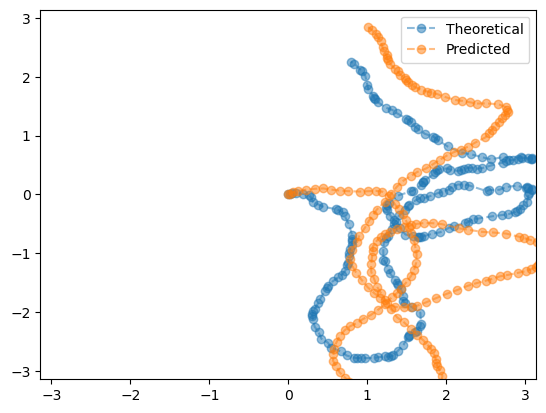

In [ ]:
basises = np.array(basises)

pos = np.zeros((n_test,t_test+1,2))
pos[:,:,0] = xtheta*basises[0,0] + ytheta*basises[1,0] + ztheta*basises[2,0]
pos[:,:,1] = xtheta*basises[0,1] + ytheta*basises[1,1] + ztheta*basises[2,1]

n = 299
plt.plot(pos[n,:,0],pos[n,:,1],'--o', alpha=0.5, label='Theoretical')
xpath = np.zeros((xangs.shape[0],xangs.shape[1]+1))
ypath = np.zeros((xangs.shape[0],xangs.shape[1]+1))
zpath = np.zeros((xangs.shape[0],xangs.shape[1]+1))
# xpath[:,0] = 0
# ypath[:,0] = 0
for i in range(1,xangs.shape[1]+1):
    xpath[:,i] = xpath[:,i-1] + xangs[:,i-1]
    ypath[:,i] = ypath[:,i-1] + yangs[:,i-1]
    zpath[:,i] = zpath[:,i-1] + zangs[:,i-1]
pos_hat = np.zeros((n_test,t_test+1,2))
pos_hat[:,:,0] = xpath*basises[0,0] + ypath*basises[1,0] + zpath*basises[2,0]
pos_hat[:,:,1] = xpath*basises[0,1] + ypath*basises[1,1] + zpath*basises[2,1]
plt.plot(pos_hat[n,:,0],pos_hat[n,:,1],'--o', alpha=0.5, label='Predicted')
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.legend()
plt.show()

In [ ]:
# plt.plot(xtheta[n,:],label="Theoretical x")
# plt.plot(xpath[n,:],label="Predicted x")
# plt.legend()
# plt.show()
# plt.plot(ytheta[n,:],label="Theoretical y")
# plt.plot(ypath[n,:],label="Predicted y")
# plt.legend()
# plt.show()
# plt.plot(ztheta[n,:],label="Theoretical z")
# plt.plot(zpath[n,:],label="Predicted z")
# plt.legend()
# plt.show()

In [ ]:
# Mean squared error of pos and pos_hat
print(np.mean((pos-pos_hat)**2))

0.94387737831175


#### Full 2D model Low

In [ ]:
n_test = 1000
t_test = 100
# data,labels = smooth_wandering_2D_squarefix_randomstart_hdv(n_test,t_test,bound=0.5,v_sigma=0.01,d_sigma=0.08,v_bound_reduction=0.15,stability=0.0)
data,labels = smooth_wandering_2D_ratinabox(n_test,t_test)
# data,labels = smooth_wandering_2D_squarefix_randomstart_hdv_vrng(n_test,t_test,bound=0.5,v_sigma_mean=0.01,d_sigma=0.08,v_bound_reduction=0.15,stability=0.01)
labels_sincos = sincos_from_2D(labels)

# labels = torch.cat((torch.zeros((labels.shape[0],1,labels.shape[2])),labels),dim=1)

# Inference
out = model1(data,inference=True)
out = out[1:,:,:].transpose(1,0,2)
# out = out.transpose(1,0,2)[:,1:,:]

out_decoded = sincos_to_2D(torch.Tensor(out))
labels = labels.detach().cpu().numpy()
labels_sincos = labels_sincos.detach().cpu().numpy()
out_decoded = out_decoded.detach().cpu().numpy()
data = data.detach().cpu().numpy()
# out = out.detach().cpu().numpy()

# Shift the predicted values so that the first timestep aligns with theoretical value
# out = out - np.expand_dims((out[:,0,:] - labels[:,0,:]),1)
# out_decoded = out_decoded - np.expand_dims((out_decoded[:,0,:] - labels[:,0,:]),1)
# out_decoded = out_decoded - np.expand_dims((out_decoded[:,0,:] - data[:,0,:].squeeze()),1)

mse = np.mean((labels_sincos-out)**2)
# mse = np.mean((labels-out_decoded[1:,:,:].transpose(1,0,2))**2)
# mse = np.mean((labels-out_shifted)**2)
print(mse)

[2023-08-18 20:40:00,259] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,267] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,275] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,283] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,292] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,303] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,312] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,324] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,332] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,344] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,354] torch._inductor.utils: [WARNING] DeviceCopy in input program
[2023-08-18 20:40:00,364] torch._inductor.u

0.0049153347


In [ ]:
# path = np.zeros((out.shape[0],out.shape[1],2))
# path[:,0,0] = 0
# path[:,0,1] = 0
# for i in range(1,out.shape[1]):
#     path[:,i,0] = path[:,i-1,0] + out[:,i-1,0]
#     path[:,i,1] = path[:,i-1,1] + out[:,i-1,1]

# mse = torch.mean((labels-path)**2)
# print(mse)

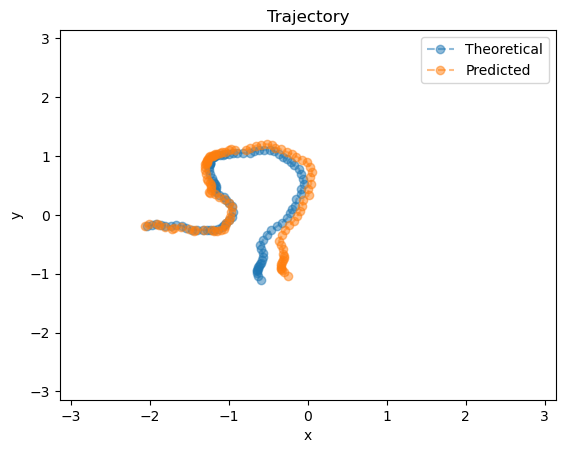

In [ ]:
n = 10
plt.plot(labels[n,:,0],labels[n,:,1],"--o", alpha=0.5, label="Theoretical")
plt.plot(out_decoded[n,:,0],out_decoded[n,:,1],"--o", alpha=0.5, label="Predicted")
# plt.plot(out[n,:,0],out[n,:,1],"--o", alpha=0.5, label="Predicted")
# plt.plot(path[n,:,0],path[n,:,1],"--o", alpha=0.5, label="Predicted")
plt.legend()
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory")
plt.show()

Mean error:  0.16350034
Mean end error:  0.28473997


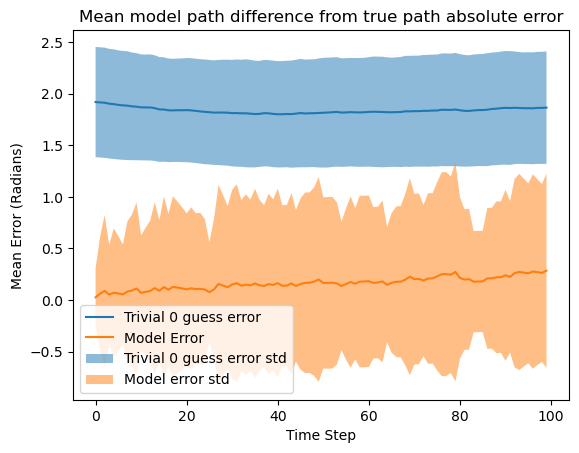

In [ ]:
# FOR RANDOMSTART MUST ADD START TO PATH

# Calculate path error
path = out_decoded
# path = out
y = labels
path_err = np.sqrt(np.abs(path[:,:,0]-y[:,:,0])**2 + np.abs(path[:,:,0]-y[:,:,0])**2)
path_err_mean = np.mean(path_err,axis=0)
path_err_mean_std = np.std(path_err,axis=0)
t_test = path_err.shape[1]
# Calculate trivial path error
y_mean = np.mean(np.abs(y-0),axis=0)
y_mean_std = np.std(np.abs(y-0),axis=0)
trivial_path_err = np.sqrt(np.abs(path[:,:,0]-y_mean[:,0]) + np.abs(path[:,:,1]-y_mean[:,1]))
trivial_path_err_mean = np.mean(trivial_path_err,axis=0)
trivial_path_err_mean_std = np.std(trivial_path_err,axis=0)
# Print mean error
print("Mean error: ",np.mean(path_err))
print("Mean end error: ",path_err_mean[-1])

# Plot
plt.plot(trivial_path_err_mean,label="Trivial 0 guess error")
plt.plot(path_err_mean,label="Model Error")
plt.fill_between(np.arange(t_test),trivial_path_err_mean-trivial_path_err_mean_std,trivial_path_err_mean+trivial_path_err_mean_std,alpha=0.5, label="Trivial 0 guess error std")
plt.fill_between(np.arange(t_test),path_err_mean-path_err_mean_std,path_err_mean+path_err_mean_std,alpha=0.5, label="Model error std")
plt.legend()
plt.title("Mean model path difference from true path absolute error")
plt.xlabel("Time Step")
plt.ylabel("Mean Error (Radians)")
plt.show()

### Full 2D non-low

In [ ]:
n_test = 1000
t_test = 100
# data,labels = smooth_wandering_2D_squarefix_randomstart_hdv(n_test,t_test,bound=0.5,v_sigma=0.01,d_sigma=0.08,v_bound_reduction=0.15,stability=0.00)
# data,labels = smooth_wandering_2D_squarefix_hdv(n_test,t_test,bound=0.5,v_sigma=0.01,d_sigma=0.08,v_bound_reduction=0.15,stability=0.00)
data,labels = smooth_wandering_2D_ratinabox(n_test,t_test)
# data,labels = smooth_wandering_2D_squarefix(n_test,t_test,bound=0.5,v_sigma=0.01,d_sigma=0.08,v_bound_reduction=0.15,stability=0.00)
# data,labels_convert = hd_direction_input_convert_partial(data,labels)
# data,labels = input_data[-1,0].to(device), input_data[-1,1].to(device)

# labels = torch.cat((torch.zeros((labels.shape[0],1,labels.shape[2])),labels),dim=1)

# Inference
# out = model1(data, inference=True,raw=False)
out = model1.output(model1(data,inference=False,raw=True))
# out = out.transpose(1,0,2)[:,1:,:]

labels = labels.detach().cpu().numpy()
# labels_convert = labels_convert.detach().cpu().numpy()
out = out.detach().cpu().numpy()
data = data.detach().cpu().numpy()


# Shift the predicted values so that the first timestep aligns with theoretical value
# out = out - np.expand_dims((out[:,0,:] - labels[:,0,:]),1)

# mse = np.mean((labels_convert-out)**2)
out = out[1:,:,:].transpose(1,0,2)
mse = np.mean((labels-out)**2)
# mse = np.mean((labels-out_shifted)**2)
print(mse)

0.006172881


In [ ]:
out.shape

(1000, 200, 2)

In [ ]:
data.shape

(1000, 201, 2, 1)

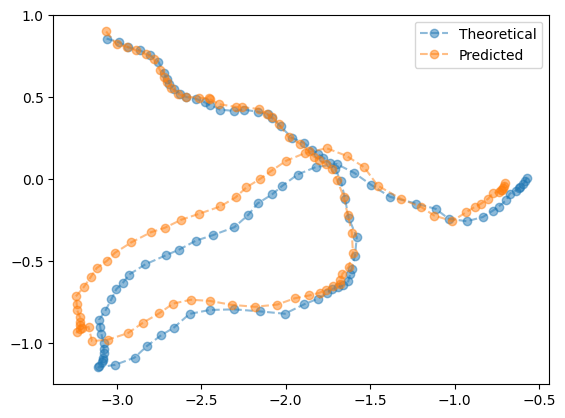

In [ ]:
n = 16
plt.plot(labels[n,:,0],labels[n,:,1],"--o", alpha=0.5, label="Theoretical")
plt.plot(out[n,:,0],out[n,:,1],"--o", alpha=0.5, label="Predicted")
# plt.plot(out[n,:,0],out[n,:,1],"--o", alpha=0.5, label="Predicted")
# plt.plot(path[n,:,0],path[n,:,1],"--o", alpha=0.5, label="Predicted")
plt.legend()
# plt.xlim(-np.pi,np.pi)
# plt.ylim(-np.pi,np.pi)
plt.show()

Mean error:  0.059638336
Mean end error:  0.13486889


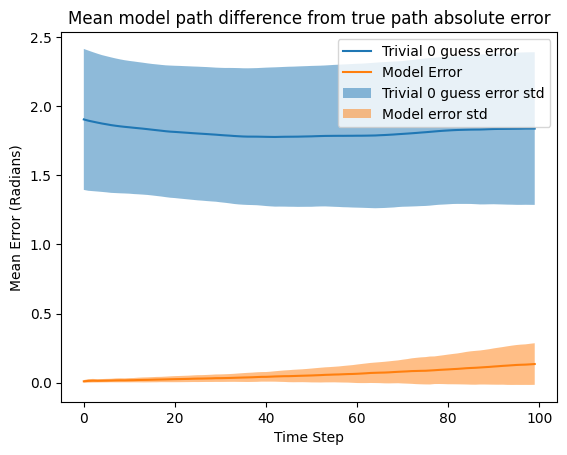

In [ ]:
# Calculate path error
path = out
# path = out
y = labels
path_err = np.sqrt(np.abs(path[:,:,0]-y[:,:,0])**2 + np.abs(path[:,:,0]-y[:,:,0])**2)
path_err_mean = np.mean(path_err,axis=0)
path_err_mean_std = np.std(path_err,axis=0)
t_test = path_err.shape[1]
# Calculate trivial path error
y_mean = np.mean(np.abs(y-0),axis=0)
y_mean_std = np.std(np.abs(y-0),axis=0)
trivial_path_err = np.sqrt(np.abs(path[:,:,0]-y_mean[:,0]) + np.abs(path[:,:,1]-y_mean[:,1]))
trivial_path_err_mean = np.mean(trivial_path_err,axis=0)
trivial_path_err_mean_std = np.std(trivial_path_err,axis=0)
# Print mean error
print("Mean error: ",np.mean(path_err))
print("Mean end error: ",path_err_mean[-1])

# Plot
plt.plot(trivial_path_err_mean,label="Trivial 0 guess error")
plt.plot(path_err_mean,label="Model Error")
plt.fill_between(np.arange(t_test),trivial_path_err_mean-trivial_path_err_mean_std,trivial_path_err_mean+trivial_path_err_mean_std,alpha=0.5, label="Trivial 0 guess error std")
plt.fill_between(np.arange(t_test),path_err_mean-path_err_mean_std,path_err_mean+path_err_mean_std,alpha=0.5, label="Model error std")
plt.legend()
plt.title("Mean model path difference from true path absolute error")
plt.xlabel("Time Step")
plt.ylabel("Mean Error (Radians)")
plt.show()